<a href="https://colab.research.google.com/github/andreagurioli1995/IoT-Air-Quality-Monitoring-System/blob/stable/forecasting/forecasting-fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
dataset_path = "/content/temp.csv"
df = pd.read_csv(dataset_path)
df["409151bfa0cc"]= pd.DatetimeIndex(df["409151bfa0cc"])
df.rename(columns={'409151bfa0cc':'ds','409151bfa0cc.1':'y'},inplace=True)

In [23]:
df.head()

,ds,y
0,2022-06-05 23:02:52,28.2
1,2022-06-05 23:02:54,28.2
2,2022-06-05 23:02:57,28.1
3,2022-06-05 23:02:59,28.2
4,2022-06-05 23:03:02,28.2


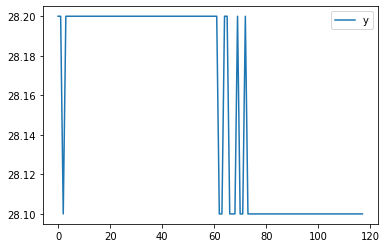

In [24]:
#evolution over time of our data
plot_cols = ['y']
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True)



In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,118.0,28.155085,0.049953,28.1,28.1,28.2,28.2,28.2


In [35]:
nrows = (len(df.values))
splitPoint = int (nrows * 0.60)
train = df['y'] [:splitPoint]
test = df ['y'] [splitPoint: ]

Check for stationarity 

In [36]:
 #Step 3: Check whether the time-series is stationary through the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

ADF Statistic: -0.539168
p-value: 0.884144


In [37]:
train_new = train.diff().dropna()

result = adfuller(train_new)

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

ADF Statistic: -3.644909
p-value: 0.004958


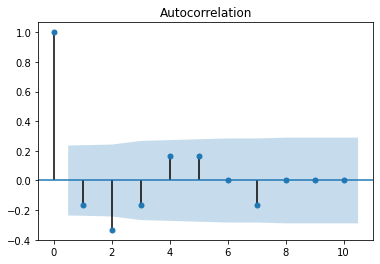

In [38]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(train_new, lags=10)
plt.show()

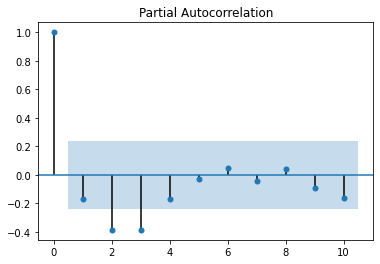

In [39]:
fig = tsaplots.plot_pacf(train_new, lags=10)
plt.show()

In [49]:
#Step 6; Apply ARIMA model
from statsmodels.tsa.arima_model import ARIMA
history = [x for x in train]
predictions = list()
print(test)
for t in test.index:
  model = ARIMA(history, order=(1,1,1))
  model_fit = model.fit()
  output = model_fit.forecast()
  yest = output[0]
  predictions.append(yest)
  obs= test[t]
  history.append(obs)
  print ('predicted=%f, expected=%f' % (yest, obs))

70     28.1
71     28.1
72     28.2
73     28.1
74     28.1
75     28.1
76     28.1
77     28.1
78     28.1
79     28.1
80     28.1
81     28.1
82     28.1
83     28.1
84     28.1
85     28.1
86     28.1
87     28.1
88     28.1
89     28.1
90     28.1
91     28.1
92     28.1
93     28.1
94     28.1
95     28.1
96     28.1
97     28.1
98     28.1
99     28.1
100    28.1
101    28.1
102    28.1
103    28.1
104    28.1
105    28.1
106    28.1
107    28.1
108    28.1
109    28.1
110    28.1
111    28.1
112    28.1
113    28.1
114    28.1
115    28.1
116    28.1
117    28.1
Name: y, dtype: float64
predicted=28.167454, expected=28.100000
predicted=28.132606, expected=28.100000
predicted=28.122595, expected=28.200000
predicted=28.148761, expected=28.100000
predicted=28.133078, expected=28.100000
predicted=28.123689, expected=28.100000
predicted=28.116686, expected=28.100000
predicted=28.111365, expected=28.100000
predicted=28.107364, expected=28.100000
predicted=28.104386, expected=28.100000


Test RMSE: 0.019


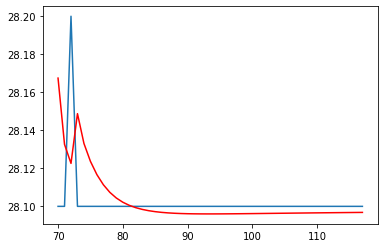

In [50]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f'% rmse)

df2 = pd. DataFrame (predictions)
df2. set_index(test.index, inplace=True)
plt.plot(test)
plt.plot(df2, color='red')
plt.show()